### PROJET FRUITS Jean-Pierre / YANIS / MEHDI / TARIK

In [1]:
#on commence par récupérer le zip
#import warnings
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# !pip install zipfile36

In [2]:
import os
# import zipfile36 as zipfile 
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.image import imread
from PIL import Image
import tensorflow as tf
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization


In [3]:
os.getcwd()
base_dir = './archive/'

train_dir = './fruits-360_dataset/fruits-360/Training/'
validation_dir =  './fruits-360_dataset/fruits-360/Test/'
os.chdir(base_dir)

In [4]:
#un peu de nettoyage 


fruits = []
fruits_image = []

for i in os.listdir(train_dir):
    for image_filename in os.listdir(train_dir + i):
        fruits.append(i) # name of the fruit 
        fruits_image.append(i + '/' + image_filename)

In [5]:
train_fruits = pd.DataFrame(fruits, columns=["Fruits"])
train_fruits["Fruits Image"] = fruits_image
train_fruits

,Fruits,Fruits Image
0,Apple Braeburn,Apple Braeburn/0_100.jpg
1,Apple Braeburn,Apple Braeburn/100_100.jpg
2,Apple Braeburn,Apple Braeburn/101_100.jpg
3,Apple Braeburn,Apple Braeburn/102_100.jpg
4,Apple Braeburn,Apple Braeburn/103_100.jpg
...,...,...
67687,Watermelon,Watermelon/r_6_100.jpg
67688,Watermelon,Watermelon/r_7_100.jpg
67689,Watermelon,Watermelon/r_81_100.jpg
67690,Watermelon,Watermelon/r_8_100.jpg


In [6]:
#on rescale les pixels des images.
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [7]:
train_generator75 = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=75,
    class_mode='categorical'  # 'binary' si solo tienes dos clases, 'categorical' si tienes más de dos clases
)

# Configura el generador de datos de validación
validation_generator75 = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(100, 100),
    batch_size=75,
    class_mode='categorical'
)

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers import Dropout

In [9]:
train_batches = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_dir, target_size=(128,128), class_mode='categorical', batch_size=10)

Found 67692 images belonging to 131 classes.


In [10]:
# Modèle 75%

inputs75 = tf.keras.layers.Input(shape=(100, 100, 3))

x = tf.keras.layers.Conv2D(12, (3, 3), activation='relu')(inputs75)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(24, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(48, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)


x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(256, activation='relu')(x)

outputs75 = tf.keras.layers.Dense(131, activation='softmax')(x)

model75 = tf.keras.models.Model(inputs=inputs75, outputs=outputs75)
model75.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 98, 98, 12)        336       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 12)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 24)        2616      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 24)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 48)        10416 

In [11]:
model75.compile(loss='categorical_crossentropy', metrics=['acc'], 
              optimizer='rmsprop')

In [12]:
history75 = model75.fit(train_generator75, epochs=10, steps_per_epoch=20, 
                   validation_data=validation_generator75)

Epoch 1/10
20/20 [==============================] - 44s 2s/step - loss: 4.7255 - acc: 0.0333 - val_loss: 4.4417 - val_acc: 0.0533
Epoch 2/10
20/20 [==============================] - 31s 2s/step - loss: 3.9019 - acc: 0.1333 - val_loss: 3.6314 - val_acc: 0.1528
Epoch 3/10
20/20 [==============================] - 31s 2s/step - loss: 3.0556 - acc: 0.2360 - val_loss: 2.9163 - val_acc: 0.2746
Epoch 4/10
20/20 [==============================] - 31s 2s/step - loss: 2.3314 - acc: 0.3800 - val_loss: 2.4015 - val_acc: 0.3631
Epoch 5/10
20/20 [==============================] - 31s 2s/step - loss: 1.9267 - acc: 0.4727 - val_loss: 2.1331 - val_acc: 0.4326
Epoch 6/10
20/20 [==============================] - 31s 2s/step - loss: 1.4459 - acc: 0.5907 - val_loss: 1.8406 - val_acc: 0.5168
Epoch 7/10
20/20 [==============================] - 31s 2s/step - loss: 1.3296 - acc: 0.6240 - val_loss: 1.6334 - val_acc: 0.5819
Epoch 8/10
20/20 [==============================] - 31s 2s/step - loss: 1.0861 - acc: 0.69

In [13]:
def diagnostic_learning_curves75():
  # Retrieve a list of accuracy results on training and validation data
  # sets for each training epoch
  acc = history75.history['acc']
  val_acc = history75.history['val_acc']

  # Retrieve a list of list results on training and validation data
  # sets for each training epoch
  loss = history75.history['loss']
  val_loss = history75.history['val_loss']

  # Get number of epochs
  epochs = range(len(acc))

  # Plot training and validation accuracy per epoch
  plt.plot(epochs, acc)
  plt.plot(epochs, val_acc)
  plt.title('Training and validation accuracy')

  plt.figure()

  # Plot training and validation loss per epoch
  plt.plot(epochs, loss)
  plt.plot(epochs, val_loss)
  plt.title('Training and validation loss')

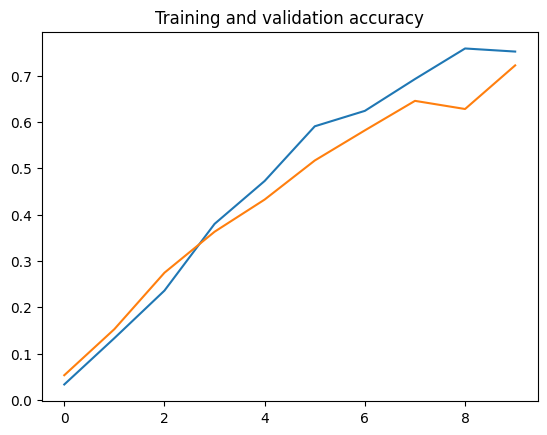

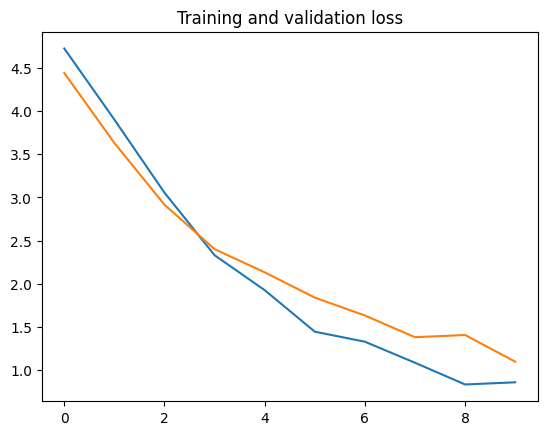

In [14]:
diagnostic_learning_curves75()

In [15]:
train_generator80 = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=64,
    class_mode='categorical'  # 'binary' si solo tienes dos clases, 'categorical' si tienes más de dos clases
)

# Configura el generador de datos de validación
validation_generator80 = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(100, 100),
    batch_size=75,
    class_mode='categorical'
)


Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [16]:
# Modèle 80%+

inputs80 = tf.keras.layers.Input(shape=(100, 100, 3))

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(inputs80)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(32, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(64, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)


x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs80 = tf.keras.layers.Dense(131, activation='softmax')(x)

model80 = tf.keras.models.Model(inputs=inputs80, outputs=outputs80)
model80.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 49, 49, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 64)        1849

In [17]:
model80.compile(loss='categorical_crossentropy', metrics=['acc'], 
              optimizer='rmsprop')

In [18]:
history80 = model80.fit(train_generator80, epochs=15, steps_per_epoch=30, 
                   validation_data=validation_generator80)

Epoch 1/15
30/30 [==============================] - 37s 1s/step - loss: 4.7648 - acc: 0.0333 - val_loss: 4.5067 - val_acc: 0.0569
Epoch 2/15
30/30 [==============================] - 36s 1s/step - loss: 3.9517 - acc: 0.1276 - val_loss: 3.3801 - val_acc: 0.2134
Epoch 3/15
30/30 [==============================] - 37s 1s/step - loss: 2.8944 - acc: 0.2943 - val_loss: 2.4194 - val_acc: 0.4059
Epoch 4/15
30/30 [==============================] - 37s 1s/step - loss: 2.0201 - acc: 0.4620 - val_loss: 2.0435 - val_acc: 0.4665
Epoch 5/15
30/30 [==============================] - 37s 1s/step - loss: 1.5981 - acc: 0.5734 - val_loss: 1.8618 - val_acc: 0.4861
Epoch 6/15
30/30 [==============================] - 37s 1s/step - loss: 1.2210 - acc: 0.6542 - val_loss: 1.3894 - val_acc: 0.6173
Epoch 7/15
30/30 [==============================] - 36s 1s/step - loss: 0.9340 - acc: 0.7224 - val_loss: 1.2859 - val_acc: 0.6275
Epoch 8/15
30/30 [==============================] - 36s 1s/step - loss: 0.8603 - acc: 0.74

In [19]:
def diagnostic_learning_curves80():
  # Retrieve a list of accuracy results on training and validation data
  # sets for each training epoch
  acc = history80.history['acc']
  val_acc = history80.history['val_acc']

  # Retrieve a list of list results on training and validation data
  # sets for each training epoch
  loss = history80.history['loss']
  val_loss = history80.history['val_loss']

  # Get number of epochs
  epochs = range(len(acc))

  # Plot training and validation accuracy per epoch
  plt.plot(epochs, acc)
  plt.plot(epochs, val_acc)
  plt.title('Training and validation accuracy')

  plt.figure()

  # Plot training and validation loss per epoch
  plt.plot(epochs, loss)
  plt.plot(epochs, val_loss)
  plt.title('Training and validation loss')

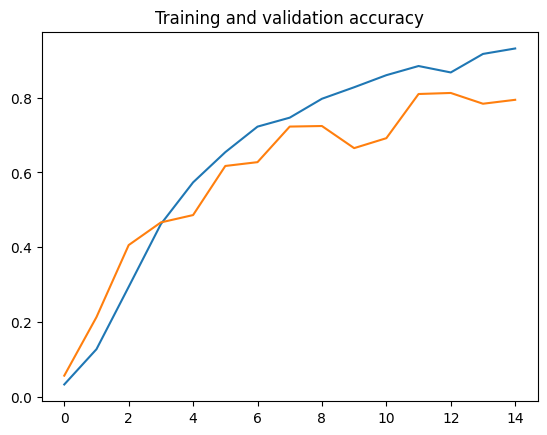

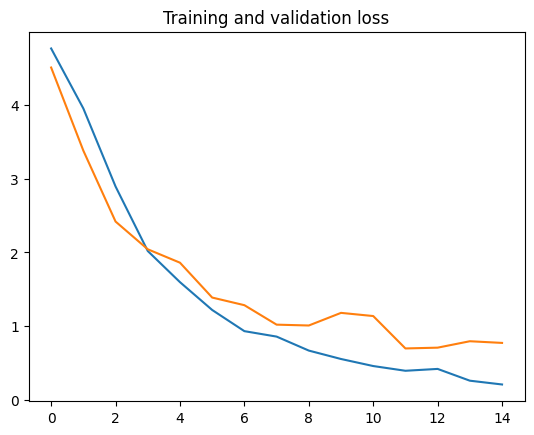

In [20]:
diagnostic_learning_curves80()

In [21]:
# model80.save('modele_82.h5')

In [25]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=60,
    class_mode='categorical'  # 'binary' si solo tienes dos clases, 'categorical' si tienes más de dos clases
)

# Configura el generador de datos de validación
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(100, 100),
    batch_size=60,
    class_mode='categorical'
)


Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [26]:
# Modèle 91%

inputs = tf.keras.layers.Input(shape=(100, 100, 3))

x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(64, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(128, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)


x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(256, activation='relu')(x)

outputs = tf.keras.layers.Dense(131, activation='softmax')(x)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_9 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 49, 49, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 23, 23, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 21, 21, 128)       7385

In [27]:
model.compile(loss='categorical_crossentropy', metrics=['acc'], 
              optimizer='rmsprop')

In [28]:
history = model.fit(train_generator, epochs=20, steps_per_epoch=50, 
                   validation_data=validation_generator)

Epoch 1/20
50/50 [==============================] - 75s 2s/step - loss: 4.4309 - acc: 0.0617 - val_loss: 3.3854 - val_acc: 0.1974
Epoch 2/20
50/50 [==============================] - 75s 2s/step - loss: 2.4205 - acc: 0.3667 - val_loss: 1.7957 - val_acc: 0.4986
Epoch 3/20
50/50 [==============================] - 74s 2s/step - loss: 1.2289 - acc: 0.6343 - val_loss: 1.3951 - val_acc: 0.6100
Epoch 4/20
50/50 [==============================] - 75s 2s/step - loss: 0.8269 - acc: 0.7570 - val_loss: 1.1806 - val_acc: 0.6815
Epoch 5/20
50/50 [==============================] - 75s 2s/step - loss: 0.5548 - acc: 0.8390 - val_loss: 0.7771 - val_acc: 0.8035
Epoch 6/20
50/50 [==============================] - 75s 2s/step - loss: 0.4530 - acc: 0.8650 - val_loss: 1.1364 - val_acc: 0.7200
Epoch 7/20
50/50 [==============================] - 74s 2s/step - loss: 0.3307 - acc: 0.9053 - val_loss: 0.8790 - val_acc: 0.7343
Epoch 8/20
50/50 [==============================] - 75s 2s/step - loss: 0.2820 - acc: 0.91

In [29]:
def diagnostic_learning_curves():
  # Retrieve a list of accuracy results on training and validation data
  # sets for each training epoch
  acc = history.history['acc']
  val_acc = history.history['val_acc']

  # Retrieve a list of list results on training and validation data
  # sets for each training epoch
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  # Get number of epochs
  epochs = range(len(acc))

  # Plot training and validation accuracy per epoch
  plt.plot(epochs, acc)
  plt.plot(epochs, val_acc)
  plt.title('Training and validation accuracy')

  plt.figure()

  # Plot training and validation loss per epoch
  plt.plot(epochs, loss)
  plt.plot(epochs, val_loss)
  plt.title('Training and validation loss')

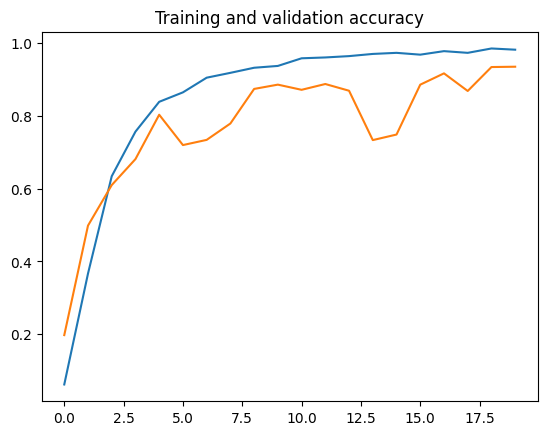

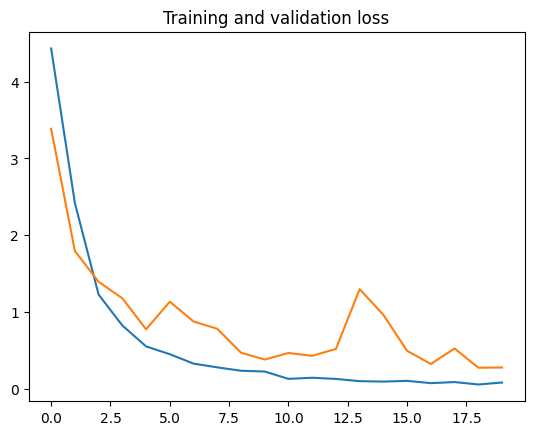

In [30]:
diagnostic_learning_curves()

In [31]:
# Prediction
# y_proba = model.predict(validation_generator) 
# y_proba
# pd.Series(y_proba.flatten()).head()

In [32]:
# y_pred = (y_proba == np.argmax).astype('int32')
# y_pred

In [33]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix
# from mlxtend.plotting import plot_confusion_matrix

# # Supposons que votre modèle prédit des probabilités pour chaque classe
# # Assurez-vous de convertir ces probabilités en classes prédites
# y_pred_prob = model.predict(validation_generator)
# y_pred = np.argmax(y_pred_prob, axis=1)

# # Obtenez les étiquettes réelles
# y_true = validation_generator.classes

# # Créez la matrice de confusion
# conf_mat = confusion_matrix(y_true, y_pred)

# # Définissez les noms de classe
# class_names = ['apple', 'cherry', 'banana']

# # Tracez la matrice de confusion
# plot_confusion_matrix(conf_mat=conf_mat,
#                       colorbar=True,
#                       show_absolute=True,
#                       show_normed=True)
#                       # class_names=class_names)

# plt.show()


In [34]:
# model.save("modele.h5")